# Profiling du dataset *Nombre de décès quotidiens en France*

Dans ce notebook, on évalue l'exploitabilité du jeu de données *Nombre de décès quotidiens*(https://www.data.gouv.fr/fr/datasets/nombre-de-deces-quotidiens-par-departement/) par des algorithmes de Machine Learning. On choisit ici deux datasets en particulier: un dataset sur le nombre total de décès quotidiens en France en 2018,2019, 2020, début 2021 et un dataset sur les décès quotidiens par sexe et classe d'âge.


In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Import des jeu de données
### Dataset des décès quotidiens en 2018, 2019 et 2020

In [2]:
path_dc = "data/2021-01-29_deces_quotidiens_departement_csv.csv" #path csv décès quotidiens
data_dc = pd.read_csv(path_dc, encoding = "latin-1",sep=";")

### Dataset des décès quotidiens par sexe et âge

In [4]:
path_sex_age = "data/2021-01-22_deces_parsexe_age_jour_France.csv"
data_sex_age = pd.read_csv(path_sex_age, encoding = "latin-1",sep=";")

## Profiling du premier dataset

In [5]:
profile_dc = data_dc.profile_report()
#profile_dc

## Profiling du deuxième dataset

In [6]:
profile_sex_age = data_sex_age.profile_report()
#profile_sex_age

#### Histogrammes et densités de chaque variable

/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/giulia/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

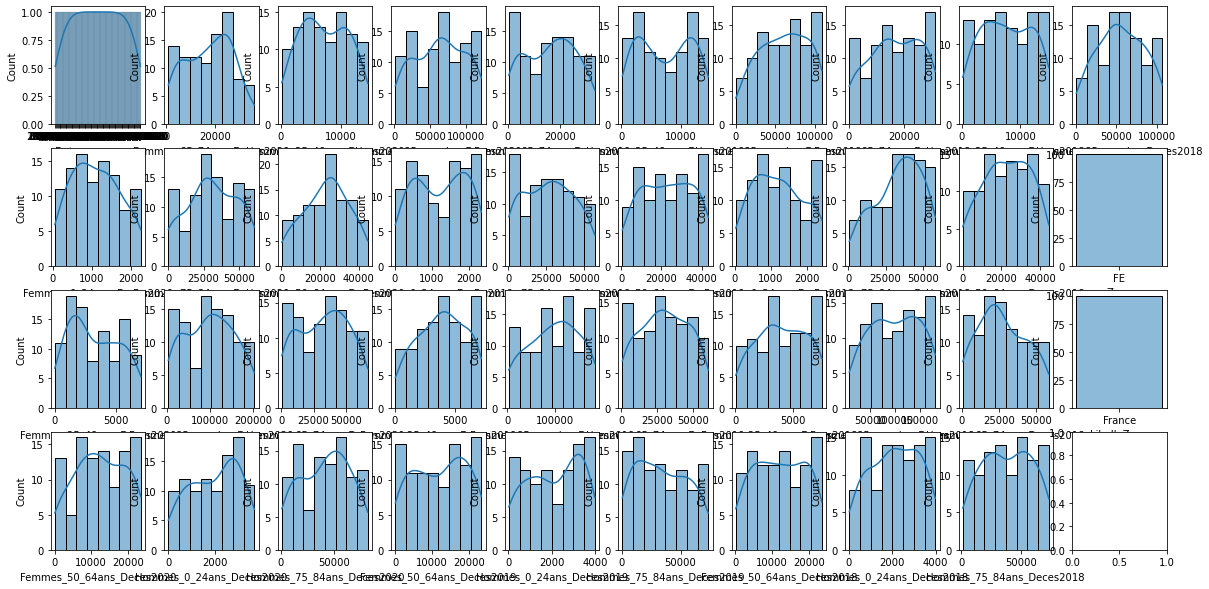

In [7]:
n_rows = 4
n_cols = 10
plt.subplots_adjust(hspace=0.9)
fig, axs = plt.subplots(n_rows,n_cols,figsize=(20,10))
for i,col in enumerate(data_sex_age.columns):
  sns.histplot(data_sex_age.sample(100), x=col, kde=True, ax=axs[i%n_rows,i//n_rows])

# Analyse de l'exploitabilité des datasets 

- le premier dataset a 8 variables, dont 2 catégorielles; le deuxième a 33 variables, dont deux inutiles (reconnues par le profiling); le premier a un nombre de lignes adapté pour faire du ML, le deuxième est plus difficile à exploiter (environ 300 lignes)
- les variables oncernant 2021 ont 94% de données manquantes

Ces datasets, le premier en particulier, peut être exploitable par des modèles de séries temporelles ou par des algorithmes de Machine Learning (par exemple si couplé aux dataset sur le Covid-19.

Ce dataset peut aider à répondre à des questions telles que: quel à été l’impacte de la Covid-19 sur la mortalité? Quelles régions/département français ont été les plus touchés?